In [ ]:
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import sklearn
import pandas as pd
import os
import sys
import time
import tensorflow as tf

from tensorflow import keras

print(tf.__version__)
print(sys.version_info)
# 可以通过for循环看不同包的版本
for module in mpl, np, pd, sklearn, tf, keras:
    print(module.__name__, module.__version__)


In [3]:
# fashion_mnist图像分类数据集
fashion_mnist = keras.datasets.fashion_mnist

(x_train_all, y_train_all), (x_test, y_test) = fashion_mnist.load_data()
#前面5000张是验证集，后面55000张是训练集
x_valid, x_train = x_train_all[:5000], x_train_all[5000:]
y_valid, y_train = y_train_all[:5000], y_train_all[5000:]

#得到的是np，训练集，验证集，测试集
print(x_train.shape, y_train.shape)
print(x_valid.shape, y_valid.shape)
print(x_test.shape, y_test.shape)


26421880/26421880 [==============================] - 216s 8us/step

In [4]:
type(x_train)


numpy.ndarray

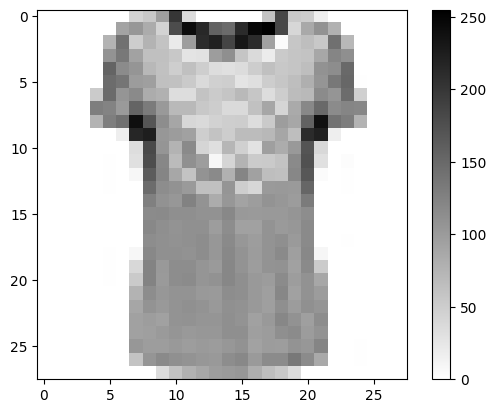

--------------------------------------------------
184
0
0


In [6]:
def show_single_image(img_arr):
    plt.imshow(img_arr, cmap="binary")  #imshow是根据像素值打印图片
    plt.colorbar()  #旁边显示一个色阶条
    plt.show()


#依次看一下x_train[0]，x_train[1]，x_train[2]就可以理解下面的循环
show_single_image(x_train[1])
print('-'*50)
print(x_train[1,0,18])  #0是纵坐标，18是横坐标的值
print(x_train[1,18,0]) 
print(y_train[1])


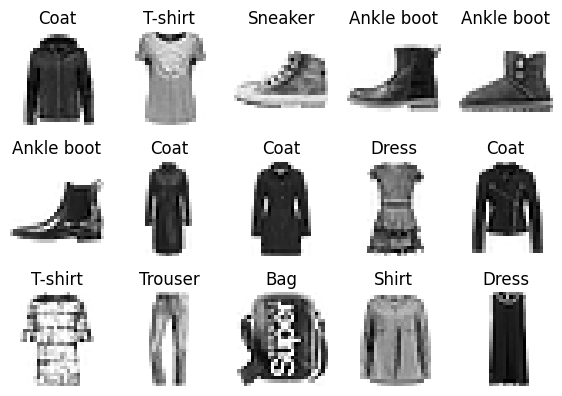

In [7]:
def show_imgs(n_rows, n_cols, x_data, y_data, class_names):
    assert len(x_data) == len(y_data)  #x和y的样本数一致
    assert n_rows * n_cols < len(x_data)  #确保打印的图片小于总样本数
    plt.figure(figsize = (n_cols * 1.4, n_rows * 1.6))  #宽1.4高1.6
    for row in range(n_rows):
        for col in range(n_cols):
            index = n_cols * row + col  #通过行和列算出来第几个样本
            plt.subplot(n_rows, n_cols, index+1)#因为从1开始
            plt.imshow(x_data[index], cmap="binary",
                       interpolation = 'nearest')
            plt.axis('off')#去除坐标系
            plt.title(class_names[y_data[index]])
    plt.show()

class_names = ['T-shirt', 'Trouser', 'Pullover', 'Dress',
               'Coat', 'Sandal', 'Shirt', 'Sneaker',
               'Bag', 'Ankle boot']
#只是打印了前15个样本
show_imgs(3, 5, x_train, y_train, class_names)



In [8]:

model = keras.models.Sequential()
#把28*28的图片展平为一个一维向量,通过下面打印可以看到两个想乘，784
model.add(keras.layers.Flatten(input_shape=[28, 28]))
print(model.output_shape)
model.add(keras.layers.Dense(300, activation="relu"))
print(model.output_shape)
model.add(keras.layers.Dense(100, activation="relu"))
model.add(keras.layers.Dense(10, activation="softmax")) #10个神经元


model.compile(loss="sparse_categorical_crossentropy",
              optimizer = keras.optimizers.SGD(0.001),
              metrics = ["accuracy"])

(None, 784)
(None, 300)


In [9]:
model.layers  #总计有4层

In [10]:
#可以来算一下参数个数
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 300)               235500    
                                                                 
 dense_1 (Dense)             (None, 100)               30100     
                                                                 
 dense_2 (Dense)             (None, 10)                1010      
                                                                 
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [12]:
#20次epoch，是指用55000样本训练20次，每一次的训练时，一次输入32个样本，batch_size
history = model.fit(x_train, y_train, epochs=20,
                    validation_data=(x_valid, y_valid))  

Epoch 1/20
1719/1719 [==============================] - 9s 5ms/step - loss: 2.7984 - accuracy: 0.7172 - val_loss: 0.6260 - val_accuracy: 0.7864

In [ ]:
type(history)

In [ ]:
#十次历史的信息
history.history

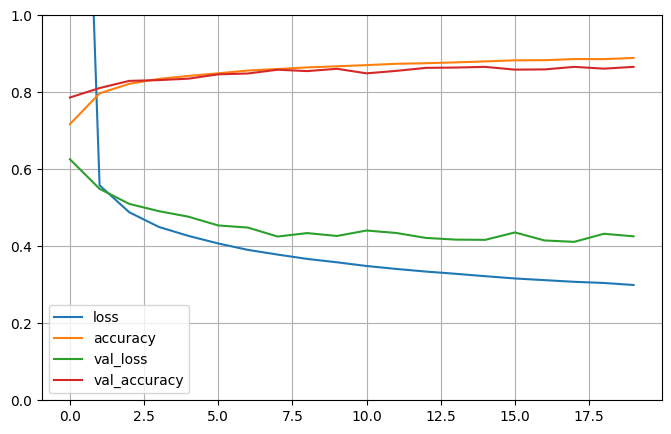

In [15]:
#画线要注意的是损失是不一定在零到1之间的
def plot_learning_curves(history):
    pd.DataFrame(history.history).plot(figsize=(8, 5))  #使用df中的折线图绘制
    plt.grid(True)
    plt.gca().set_ylim(0, 1)  #纵坐标的刻度范围
    plt.show()

plot_learning_curves(history)  #横坐标是epochs

In [16]:
#在测试集上评估，一个是测试集的损失，一个是测试集的准确率
model.evaluate(x_test, y_test, verbose=0)






[0.4410362243652344, 0.8557999730110168]